In [22]:
# impoer the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# arabic plotting
import arabic_reshaper
from bidi.algorithm import get_display


In [3]:
## uncomment the following lines to install arabic_reshaper and bidi.algorithm
# pip install arabic-reshaper
# pip install python-bidi

In [4]:
# read in the dataset

data = pd.read_csv("SA_Aqar.csv", encoding="UTF-8")

In [5]:
# look at the head
data.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,1,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,...,1,0,1,0,0,1,0,0,60000,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,0,1,0,0,0,0,0,55000,فيلا للايجار جديده لن تستخدم ش...
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,1,0,1,0,1,1,0,0,70000,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...


In [6]:
# a closer look at the features of the dataset
data_columns = {}
for column in data.columns:
  key = column
  if data[column].nunique() > 5:
    value = data[column].nunique()
  else:
    value = (data[column].nunique(), list(data[column].unique()))
  data_columns[key] = value

len(data_columns), data_columns


(24,
 {'city': (4, [' الرياض', ' جدة', ' الدمام', ' الخبر']),
  'district': 174,
  'front': 10,
  'size': 199,
  'property_age': 36,
  'bedrooms': 7,
  'bathrooms': (5, [5, 4, 3, 2, 1]),
  'livingrooms': (5, [1, 2, 3, 4, 5]),
  'kitchen': (2, [1, 0]),
  'garage': (2, [1, 0]),
  'driver_room': (2, [0, 1]),
  'maid_room': (2, [1, 0]),
  'furnished': (2, [0, 1]),
  'ac': (2, [0, 1]),
  'roof': (2, [0, 1]),
  'pool': (2, [0, 1]),
  'frontyard': (2, [1, 0]),
  'basement': (2, [0, 1]),
  'duplex': (2, [1, 0]),
  'stairs': (2, [1, 0]),
  'elevator': (2, [0, 1]),
  'fireplace': (2, [0, 1]),
  'price': 113,
  'details': 1429})

### Questions to ask:

* Which city has the highest rent rate?
* Does the district within a city play a role in increasing the rent rate?
* Do the number of various features within a house increase its rent rate?
* Which has a higher impact on the rent price: location or features?

In [7]:
data["city"].values, data["district"].values, data["front"].values

(array([' الرياض', ' الرياض', ' الرياض', ..., ' الخبر', ' الخبر', ' الخبر'],
       dtype=object),
 array(['   حي العارض ', '   حي القادسية ', '   حي القادسية ', ...,
        '   حي اللؤلؤ ', '   حي الكورنيش ', '   حي الامواج '], dtype=object),
 array(['شمال', 'جنوب', 'جنوب', ..., 'غرب', 'جنوب', 'غرب'], dtype=object))

In [8]:
# this works because we added the space in the words

# city
print(f'Number of observations with (الرياض ): {len(data[data["city"] ==  "الرياض"])}')
# district
print(f'Number of observations with ( حي العليا): {len(data[data["district"] == "حي العليا"])}')
# front
print(f'Number of observations with (غرب): {len(data[data["front"] == "غرب"])}')


Number of observations with (الرياض ): 0
Number of observations with ( حي العليا): 0
Number of observations with (غرب): 771


In [9]:
# but this doesnt work for some because we didnt add the space

# city
print(f'Number of observations with (الرياض): {len(data[data["city"] == "الرياض"])}')
# district

print(f'Number of observations with (حي العليا): {len(data[data["district"] == "حي العليا"])}')
# front
print(f'Number of observations with (غرب): {len(data[data["front"] == "غرب"])}')

Number of observations with (الرياض): 0
Number of observations with (حي العليا): 0
Number of observations with (غرب): 771


In [10]:
# fix the space surrounding the words

data["city"] = data["city"].apply(lambda city: city.strip())
data["district"] = data["district"].apply(lambda city: city.strip())
data["front"] = data["front"].apply(lambda city: city.strip())


In [11]:
# check if stripping the space worked

# city
print(f'Number of observations with (الرياض): {len(data[data["city"] == "الرياض"])}')
# district

print(f'Number of observations with (حي العليا): {len(data[data["district"] == "حي العليا"])}')
# front
print(f'Number of observations with (غرب): {len(data[data["front"] == "غرب"])}')

Number of observations with (الرياض): 960
Number of observations with (حي العليا): 80
Number of observations with (غرب): 771


Great now we continue with exploring the data, lets study the effect a city has on its rent prices

In [12]:
# make a function to plot arabic labels
def plot_arabic(labelsSeries: pd.Series):
    """
    A function that plots arabic literals in their required format instead of just floating letters
    \nArgs:
     - labelsSeries: a series of arabic labels 
    \nReturns:
     - result: a list of properly formatted arabic labels
    """

    # apply the reshaping method
    arabicLabels = labelsSeries.apply(arabic_reshaper.reshape)

    # initiate the formatting process
    result = []
    for label in arabicLabels:
        result.append(get_display(label))
    
    # return the formatted labels as a list if there are more than one value
    if len(result) == 1:
        return result[0]
    else:
        return result

In [13]:
# catplot
# sns.catplot(y="price", x=plot_arabic(data["city"]), data=data, alpha=0.2)
# plt.ylabel(plot_arabic(pd.Series("الأسعار")))
# plt.xlabel(plot_arabic(pd.Series("المدن")))
# plt.ylim(top=0.5e6)
# plt.show();

In [14]:
# data["city"].head()
# plot_arabic(data["city"])

In [15]:
# # scatter plt
# plt.title(plot_arabic(pd.Series("الأسعار حسب المدينة")))
# sns.barplot(y = "price", x=plot_arabic(data["city"]), data=data)
# plt.ylabel(plot_arabic(pd.Series("الأسعار")))
# plt.xlabel(plot_arabic(pd.Series("المدن")))
# plt.show();

In [16]:
# scatter plt
# plt.title(plot_arabic(pd.Series("الأسعار حسب المدينة")))
# sns.boxplot(y = "price", x=plot_arabic(data["city"]), data=data)
# plt.ylabel(plot_arabic(pd.Series("الأسعار")))
# plt.xlabel(plot_arabic(pd.Series("المدن")))
# plt.ylim(top=0.5e6)
# plt.show();

In [17]:
# Visualization Formula

# plt.___(data=,x=,y=)
# plt.title(plot_arabic(pd.Series(""))
# plt.xlabel(plot_arabic(pd.Series("")))
# plt.ylabel(plot_arabic(pd.Series("")))
# plt.ylim(top=0.3e6)
# plt.
# # plt.show()



In [18]:
avg_city = data.groupby(["city"])["price"].mean().sort_values().to_numpy()

prop_city = (avg_city / avg_city.max())
cities_by_price = data.groupby(["city"])["price"].mean().sort_values().index

df = pd.DataFrame({"avg_price": avg_city, "prop_to_max": prop_city}, index=cities_by_price)
df




,avg_price,prop_to_max
city,,
الدمام,63282.438479,0.560608
الخبر,79482.530738,0.704121
الرياض,94291.596875,0.835312
جدة,112881.875000,1.000000


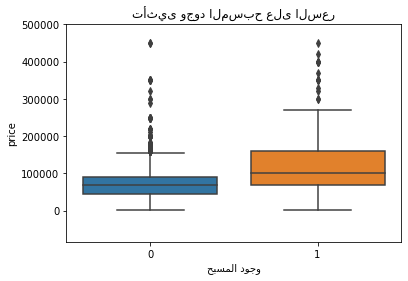

In [79]:

plt.title("تأثيى وجود المسبح على السعر")
plt.xlabel(plot_arabic(pd.Series(["وجود المسبح"])))
plt.ylabel(plot_arabic(pd.Series(["السعر"])))
sns.boxplot(x=plot_arabic(data["pool"].astype(str)),y=data["price"], data=data)
plt.ylim(top=0.5e6)  
# plt.
plt.show()







(-83950.0, 300000.0)

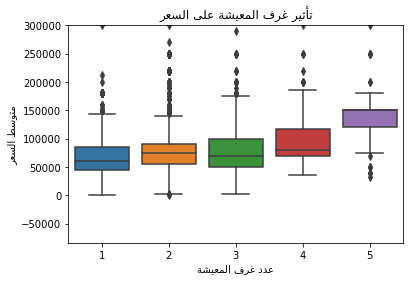

In [82]:
# this plot leads me to question the quality of the data 
# in the attribute "livingrooms" 

sns.boxplot(data=data,x="livingrooms",y="price")
plt.title(plot_arabic(pd.Series("تأثير غرف المعيشة على السعر")))
plt.xlabel(plot_arabic(pd.Series("عدد غرف المعيشة")))
plt.ylabel(plot_arabic(pd.Series("متوسط السعر")))
plt.ylim(top=0.3e6)
# plt.
# plt.show()







In [ ]:
sns.___(data=data,x=data["garage"].astype(str),y="price")
plt.title(plot_arabic(pd.Series(""))
plt.xlabel(plot_arabic(pd.Series("")))
plt.ylabel(plot_arabic(pd.Series("")))
plt.ylim(top=0.3e6)
plt.
# plt.show()




In [49]:




# figure size in inches
rcParams['figure.figsize'] = 8, 4

# excluding outlier values in price (those greater than %95 of values)
# this helps creating visualizations using sns.PairGrid
price_percentile_95th = np.percentile(data["price"], 95)
size_percentile_95th = np.percentile(data["size"], 95)

exc_outliers = data.loc[data["price"] < price_percentile_95th]
exc_outliers = data.loc[data["size"] < size_percentile_95th]


print(exc_outliers["price"].max())
print(data["price"].max())

1300000
1700000


179000

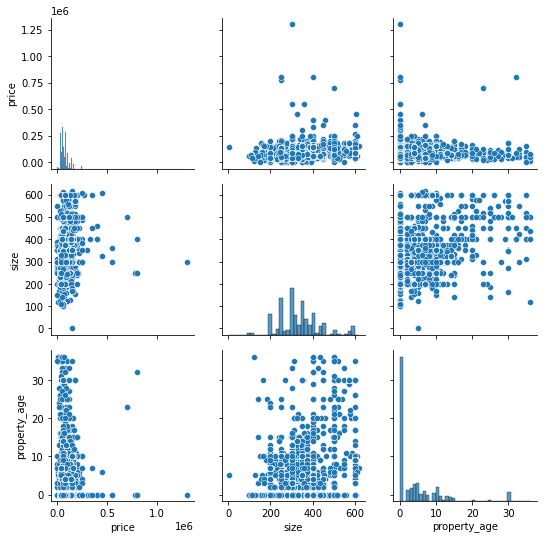

In [45]:

g = sns.PairGrid(exc_outliers[["price", "size", "property_age"]])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()



In [ ]:
plt.___(data=data,x=,y=)
plt.title(plot_arabic(pd.Series(""))
plt.xlabel(plot_arabic(pd.Series("")))
plt.ylabel(plot_arabic(pd.Series("")))
plt.ylim(top=0.3e6)
plt.
# plt.show()


